**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Dataset link: [Aerofit_treadmill.csv](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import poisson

df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [2]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
# to find lenghth of the dataset use:
len(df)

180

To find diferent data types in the dataset use:

In [4]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

The following line displays a summary of the DataFrame, including descriptive statistics for each column

In [5]:
df.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


The following lines count the occurrences of each unique value in the specified columns.

In [6]:
df["Age"].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [7]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [8]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [9]:
df["Usage"].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [10]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [11]:
df["Product"].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

The folowing line returns the number of unique values in each column of the DataFrame.

In [12]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

The following line loop prints the name of each column in the DataFrame along with the number of unique values in that column.

In [13]:
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


This returns the number of missing values in each column of the DataFrame.

In [14]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

The following lines return the dimensions and total size of the DataFrame.



In [15]:
df.shape

(180, 9)

In [16]:
df.size

1620

The following line creates a box plot of the DataFrame.

<Axes: >

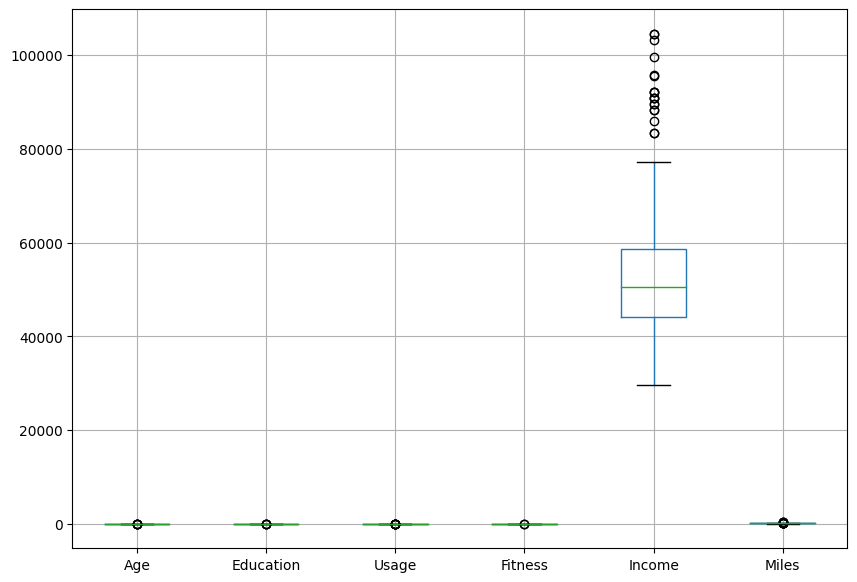

In [17]:
plt.figure(figsize = (10, 7))
df.boxplot()

The following lines return the mean and median values for each column in the DataFrame.

In [18]:
df.mean()

<ipython-input-18-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


Age             28.788889
Education       15.572222
Usage            3.455556
Fitness          3.311111
Income       53719.577778
Miles          103.194444
dtype: float64

In [19]:
df.median()

<ipython-input-19-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
dtype: float64

The following lines create count plots of the "MaritalStatus", "Product", and "Gender" columns of the DataFrame using Seaborn.

<Axes: xlabel='MaritalStatus', ylabel='count'>

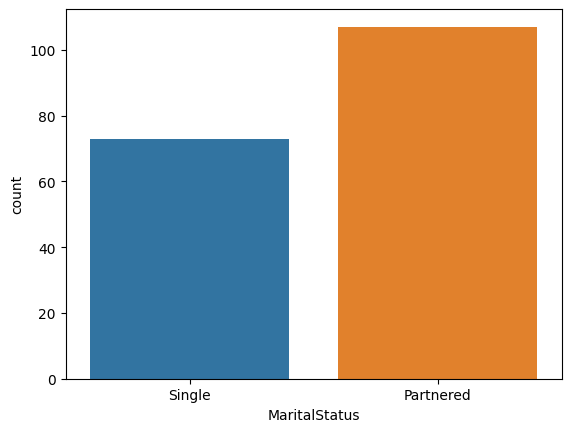

In [20]:
sns.countplot(data=df, x='MaritalStatus')

<Axes: xlabel='Product', ylabel='count'>

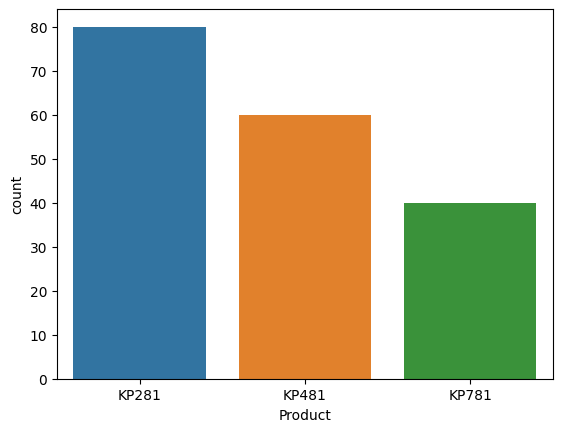

In [21]:
sns.countplot(data=df, x='Product')

<Axes: xlabel='Gender', ylabel='count'>

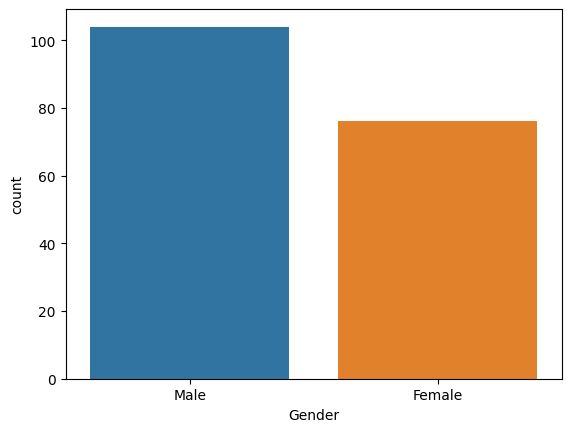

In [22]:
sns.countplot(data=df, x='Gender')

The following line creates a count plot of the "Age" column of the DataFrame using Seaborn, with the x-axis labels rotated 90 degrees.

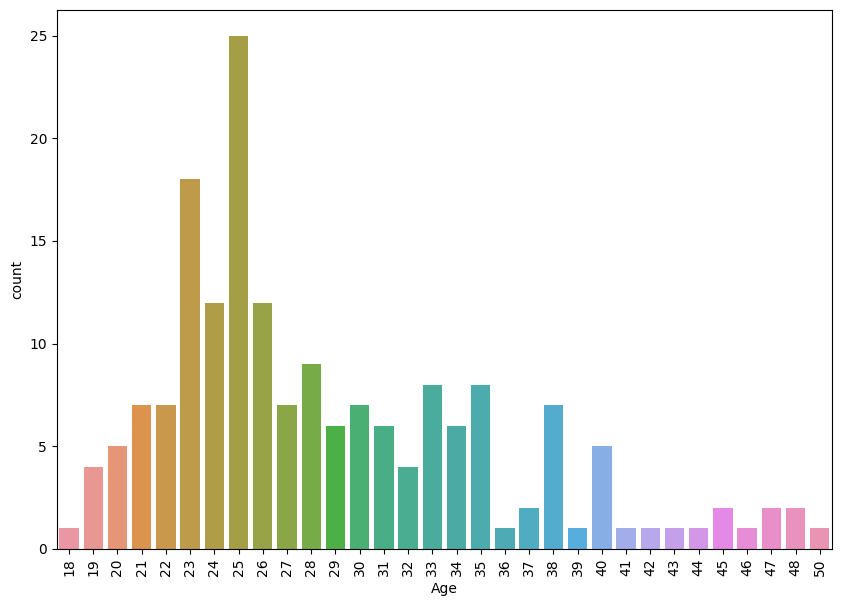

In [23]:
plt.figure(figsize = (10, 7))
sns.countplot(data=df, x='Age')
plt.xticks(rotation=90)
plt.show()

The following lines create histograms of the "Education", "Age", "Product", "Usage", and "Fitness" columns of the DataFrame using Matplotlib.

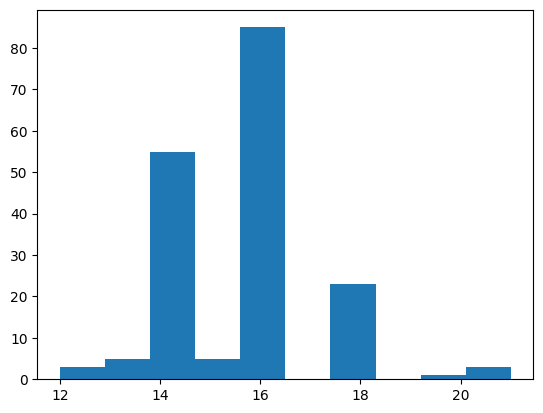

In [24]:
plt.hist(df["Education"])
plt.show()

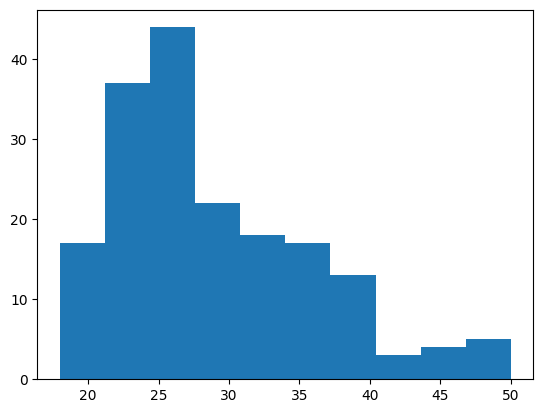

In [25]:
plt.hist(df["Age"])
plt.show()

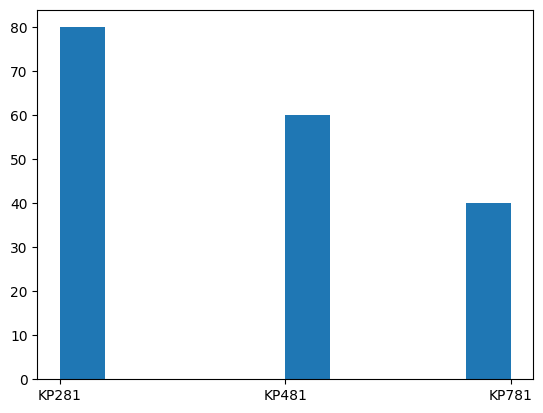

In [26]:
plt.hist(df["Product"])
plt.show()

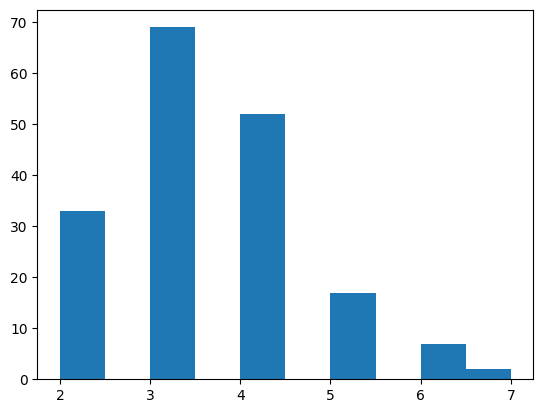

In [27]:
plt.hist(df["Usage"])
plt.show()

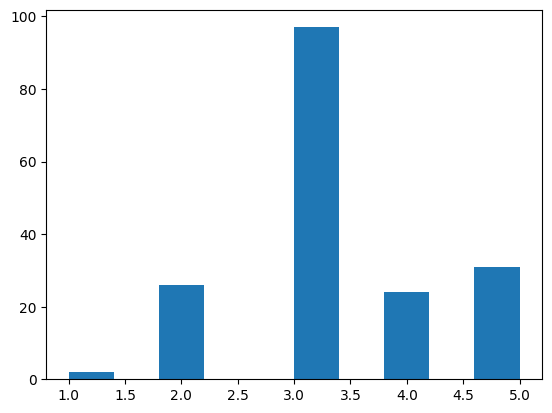

In [28]:
plt.hist(df["Fitness"])
plt.show()

Bivariate analysis : The following line create a histogram for Product and Gender columns of the DataFrame using Seaborn.

<Axes: xlabel='Product', ylabel='Count'>

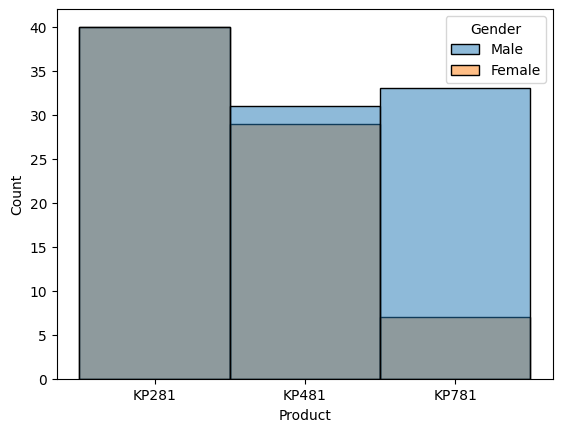

In [29]:
sns.histplot(data=df, x="Product", hue="Gender")

Bivariate analysis : The following line create a histogram for MaritalStatus and Product columns of the DataFrame using Seaborn.

<Axes: xlabel='MaritalStatus', ylabel='Count'>

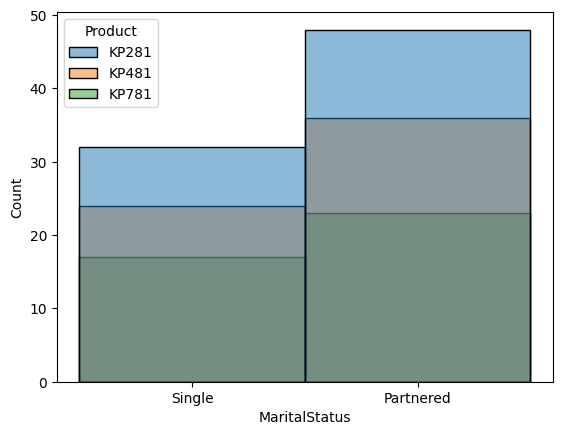

In [30]:
sns.histplot(data=df, x="MaritalStatus", hue="Product")

Bivariate analysis : The following line create a histogram for Age and Product columns of the DataFrame using Seaborn.



<Axes: xlabel='Age', ylabel='Count'>

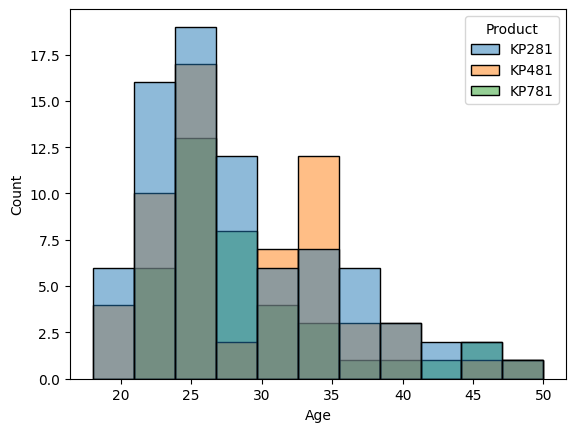

In [31]:
sns.histplot(data=df, x="Age", hue="Product")

Bivariate analysis : The following line create a histogram for Income and Product columns of the DataFrame using Seaborn.

<Axes: xlabel='Income', ylabel='Count'>

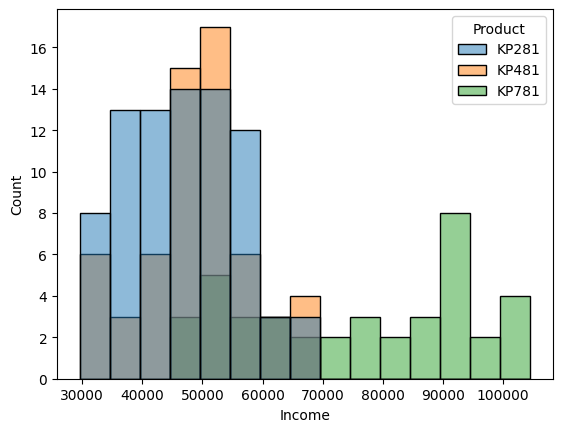

In [32]:
sns.histplot(data=df, x="Income", hue="Product")

Bivariate analysis : The following line create a histogram for Usage and Product columns of the DataFrame using Seaborn.

<Axes: xlabel='Usage', ylabel='Count'>

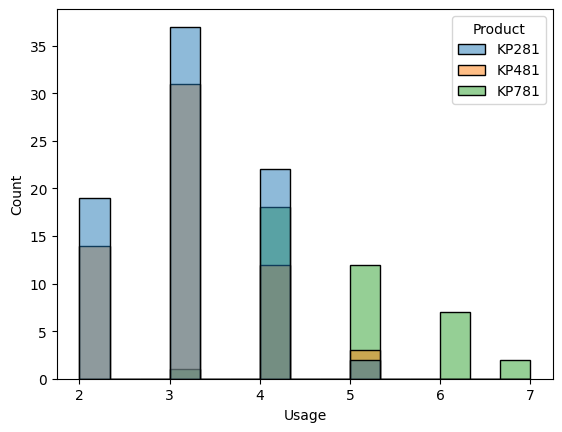

In [33]:
sns.histplot(data=df, x="Usage", hue="Product")

Bivariate analysis : The following line create a histogram for Fitness and Product columns of the DataFrame using Seaborn.

<Axes: xlabel='Fitness', ylabel='Count'>

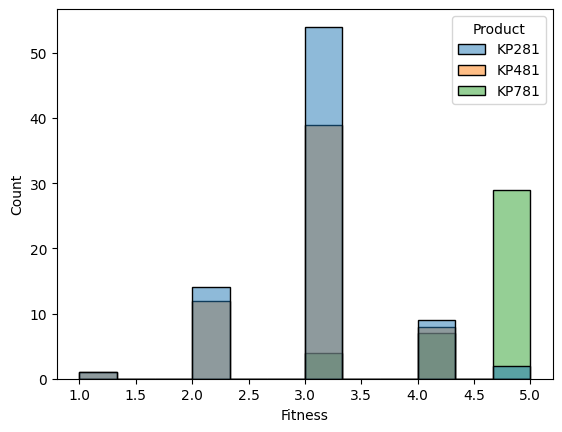

In [34]:
sns.histplot(data=df, x="Fitness", hue="Product")

Bivariate analysis : The following line create a Countplot for Fitness and Product columns of the DataFrame using Seaborn.

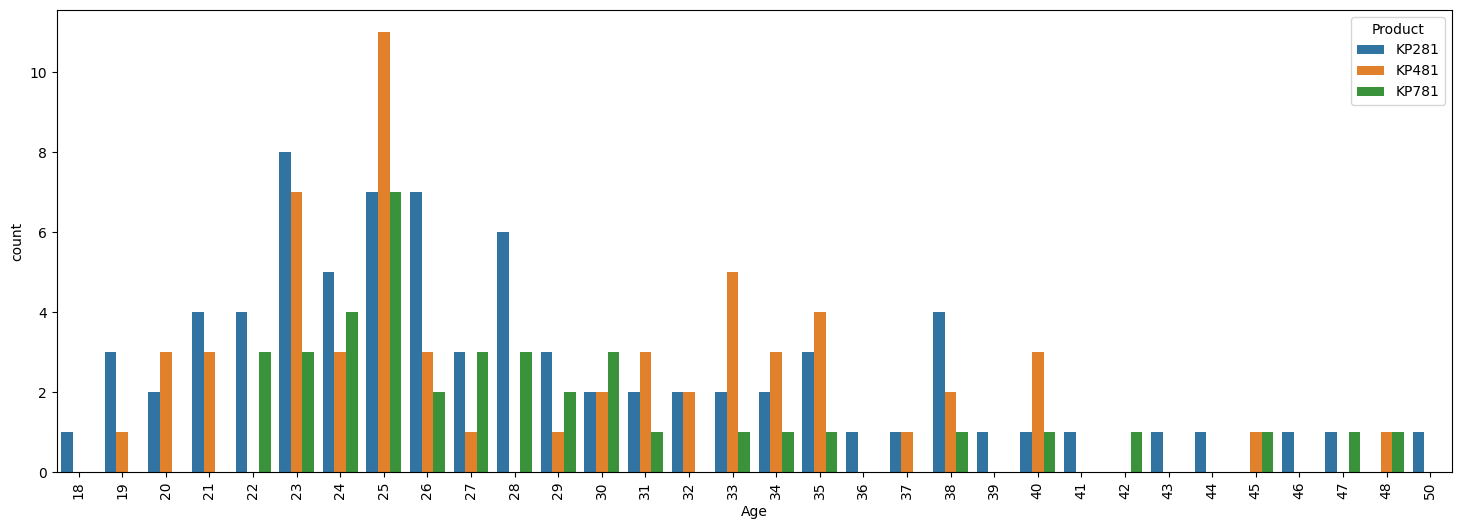

In [35]:
plt.figure(figsize = (18,6))
sns.countplot(data=df, x='Age',hue="Product")
plt.xticks(rotation=90)
plt.show()

The following line creates a crosstab between Gender and Product using Pandas . A crosstab is used to ompute a simple cross tabulation of two (or more) factors.

In [36]:
pd.crosstab(df["Gender"],df["Product"])

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33



The following line creates a crosstab between Age and Product using Pandas

In [37]:
pd.crosstab(df["Age"],df["Product"])

Product,KP281,KP481,KP781
Age,,,
18,1,0,0
19,3,1,0
20,2,3,0
21,4,3,0
22,4,0,3
23,8,7,3
24,5,3,4
25,7,11,7
26,7,3,2


The following line creates a crosstab between MaritalStatus and Product using Pandas

In [38]:
pd.crosstab(df["MaritalStatus"],df["Product"])

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


The following line creates a crosstab between Incomeand Product using Pandas

In [39]:
pd.crosstab(df["Income"],df["Product"])

Product,KP281,KP481,KP781
Income,,,
29562,1,0,0
30699,1,0,0
31836,1,1,0
32973,3,2,0
34110,2,3,0
...,...,...,...
95508,0,0,1
95866,0,0,1
99601,0,0,1


Multivariate Analysis : Analysis is done on continuous values like Age,Education,Usage,Fitness,Income,Miles against Product using Seaborn. It is used to find outliers which can be seen from the graph as points staying away from the regular graphs.

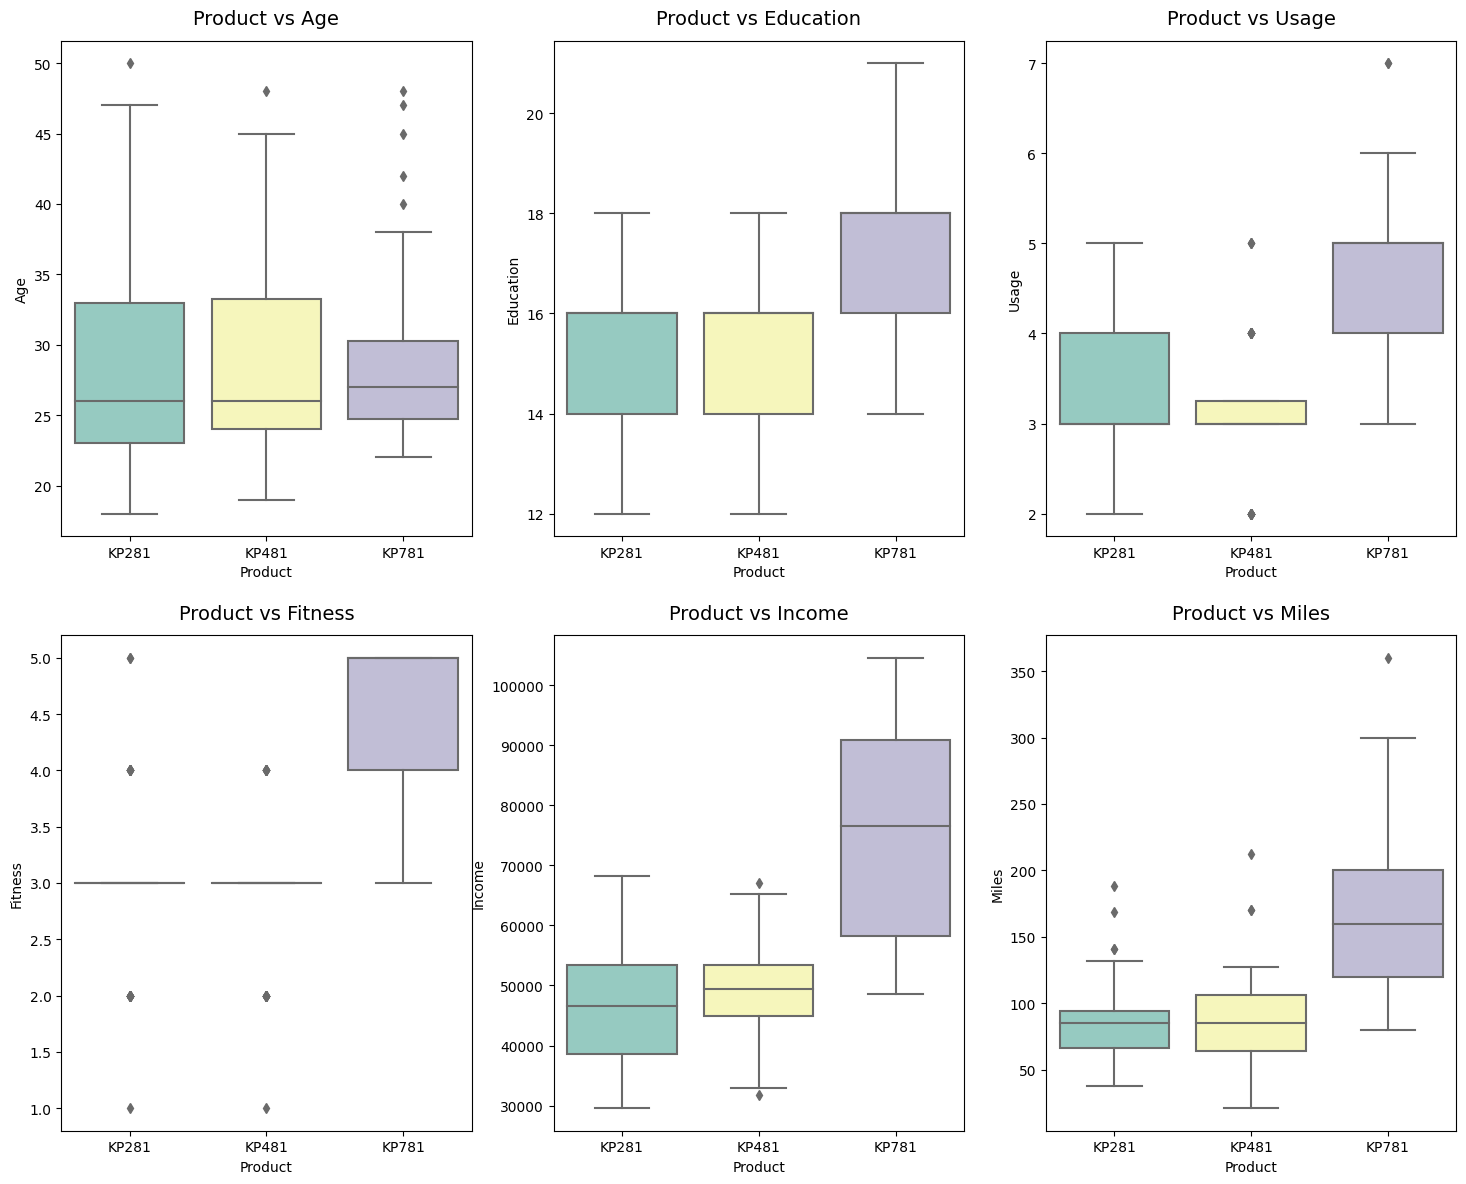

In [40]:
feat = ["Age","Education","Usage","Fitness","Income","Miles"]
fig,axs = plt.subplots(nrows = 2,ncols = 3,figsize = (18,10))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2) :
    for j in range(3) :
        sns.boxplot(data=df,x="Product",y=feat[count],ax=axs[i,j],palette="Set3")
        axs[i,j].set_title(f"Product vs {feat[count]}",pad=12,fontsize=14)
        count+=1

Multivariate Analysis : Analysis is done on continuous values like Age,Education,Usage,Fitness,Income,Miles against Product and Gender using Seaborn.

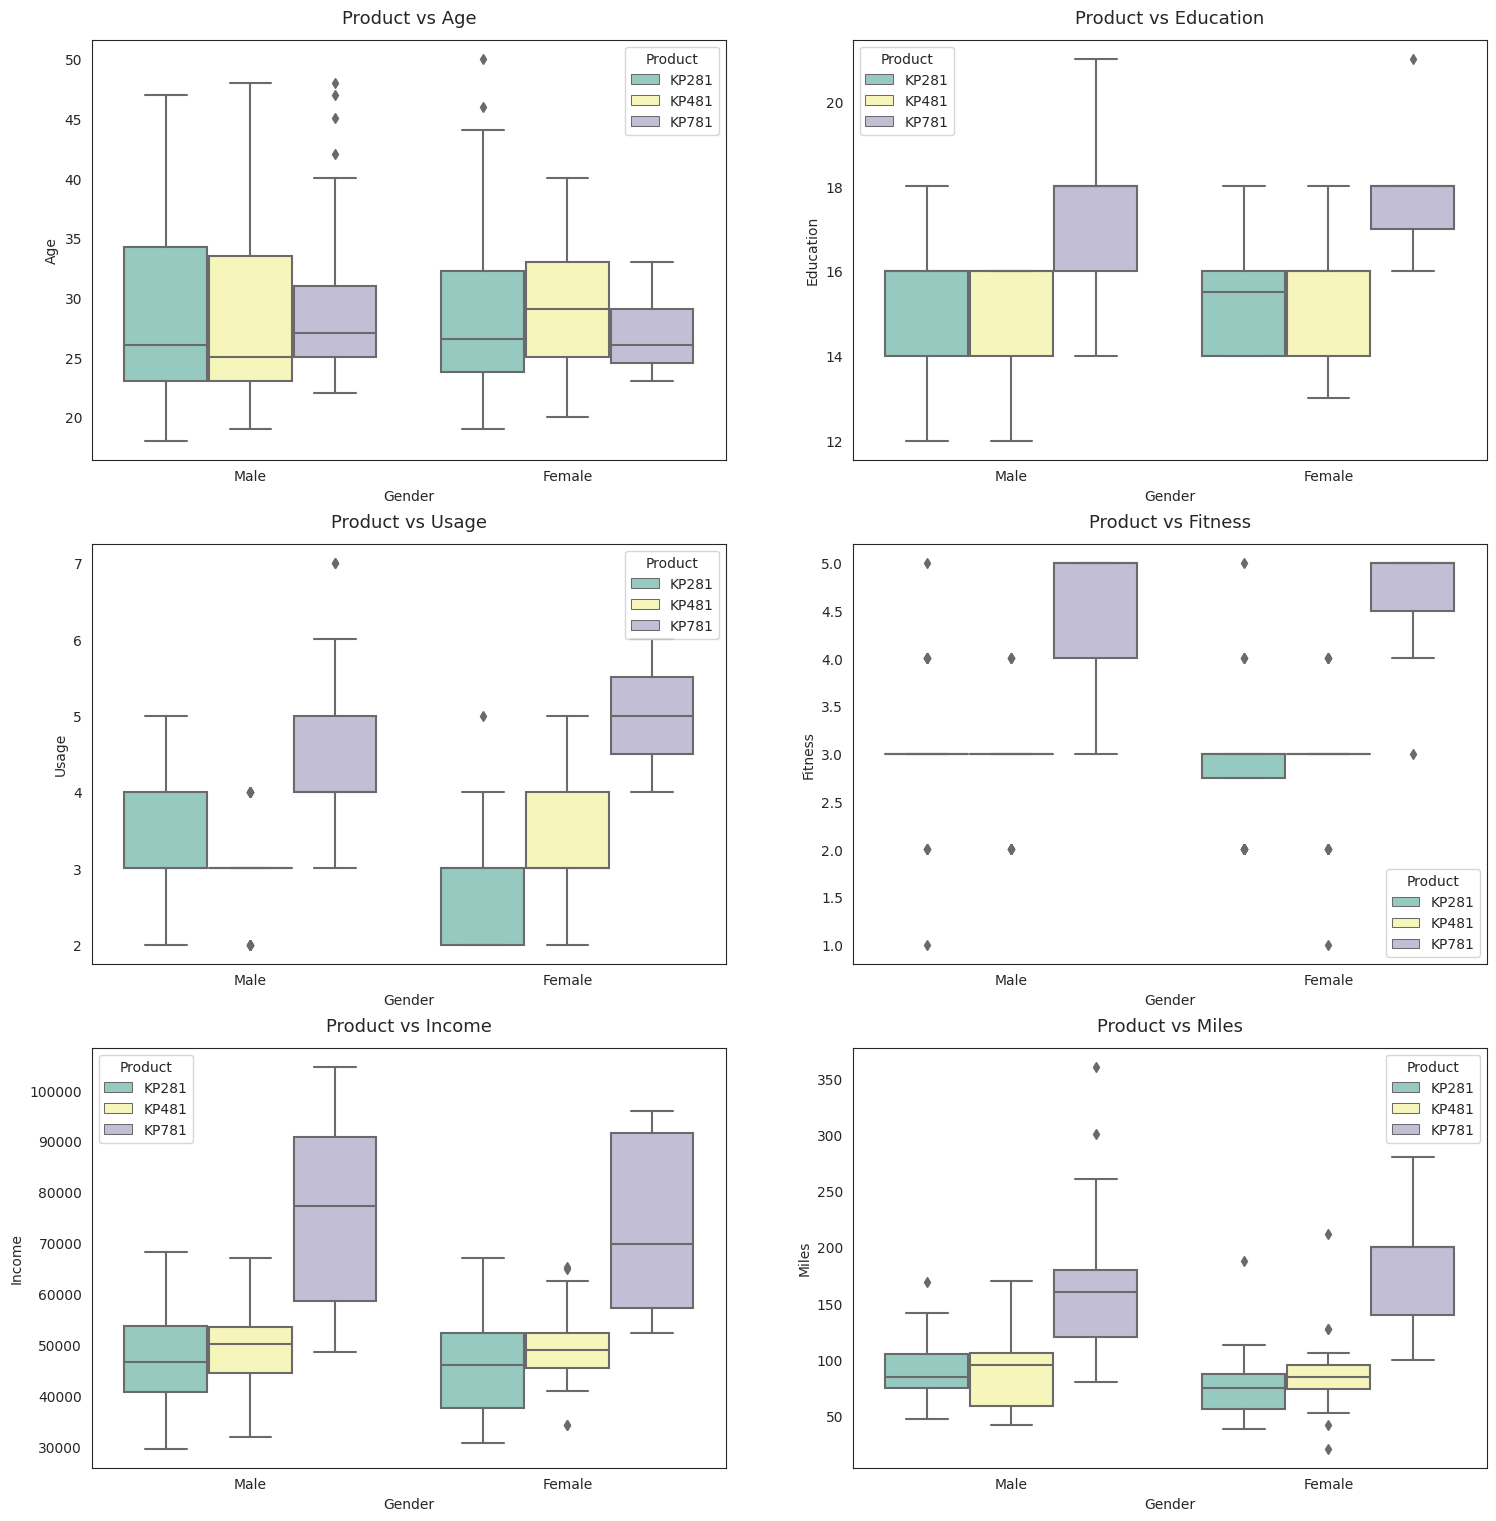

In [41]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=df, x='Gender', y=attrs[count], hue='Product', ax=axs[i,j], palette='Set3')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Conditional Probability : The probability of each Product is taken given that the Gender is male or female.

In [42]:
def prod_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."

    df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
    p781 = df1['KP781'][gender] / df1.loc[gender].sum()
    p481 = df1['KP481'][gender] / df1.loc[gender].sum()
    p281 = df1['KP281'][gender] / df1.loc[gender].sum()

    if print_marginal:
        print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
        print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{gender}): {p781:.2f}")
    print(f"P(KP481/{gender}): {p481:.2f}")
    print(f"P(KP281/{gender}): {p281:.2f}\n")

prod_gender('Male', True)
prod_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-42-476470736745>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":
<ipython-input-42-476470736745>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if gender is not "Female" and gender is not "Male":


From the above code it is clear that :

* 58% of customers are male and 42% of the customers are female.
* Out of all males 32% bought KP781 ,30% bought KP481 , 38% bought KP281.
* Out of all females 9% bought KP781 ,38% bought KP481 , 53% bought KP281.

Conditional Probability : The probability of each Product is taken given that the MaritalStatus of the customer.

In [43]:
def prod_maritalstatus(status, print_marginal=False):
    if status is not "Single" and status is not "Partnered":
        return "Invalid marital status value."

    df1 = pd.crosstab(index=df['MaritalStatus'], columns=[df['Product']])
    p781 = df1['KP781'][status] / df1.loc[status].sum()
    p481 = df1['KP481'][status] / df1.loc[status].sum()
    p281 = df1['KP281'][status] / df1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {df1.loc['Single'].sum()/len(df):.2f}")
        print(f"P(Partnered): {df1.loc['Partnered'].sum()/len(df):.2f}\n")

    print(f"P(KP781/{status}): {p781:.2f}")
    print(f"P(KP481/{status}): {p481:.2f}")
    print(f"P(KP281/{status}): {p281:.2f}\n")

prod_maritalstatus('Single', True)
prod_maritalstatus('Partnered')

P(Single): 0.41
P(Partnered): 0.59

P(KP781/Single): 0.23
P(KP481/Single): 0.33
P(KP281/Single): 0.44

P(KP781/Partnered): 0.21
P(KP481/Partnered): 0.34
P(KP281/Partnered): 0.45



<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-43-c1282818332a>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":
<ipython-input-43-c1282818332a>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if status is not "Single" and status is not "Partnered":


From the above code it is clear that :

* Out of all the customers 41% is single and 59% is partnered.
* Out of all the customers who are single 23% bought KP781,33% bought KP481,44% bought KP281.
* Out of all the customers who are partnered 21% bought KP781,34% bought KP481,45% bought KP281


A heatmap is drawn using Searborn on all continuous values. Using a heatmap to visualise a confusion matrix, time-series movements, temperature changes, correlation matrix and SHAP interaction values.

<ipython-input-44-46cee23e128a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)


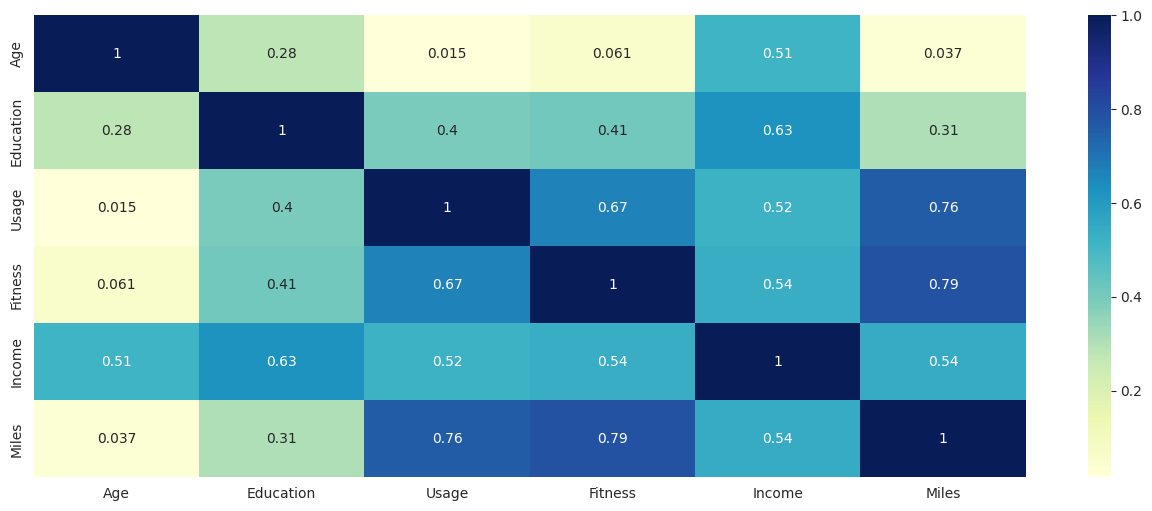

In [44]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()


A correlation matrix is found between product and other continuous values. Since product is of type object it is changed into 'int' data type.It helps to understand the relation between the continuous values and product.

In [45]:
df['Product'] =df['Product'].astype('category').cat.codes
corr_matrix=df.corr()
corr_matrix["Product"].sort_values(ascending=False)

<ipython-input-45-e35a225e4fc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


Product      1.000000
Income       0.624168
Fitness      0.594883
Miles        0.571596
Usage        0.537447
Education    0.495018
Age          0.032225
Name: Product, dtype: float64

The following code helps us to find the outliers and the values of the outliers.

<Axes: >

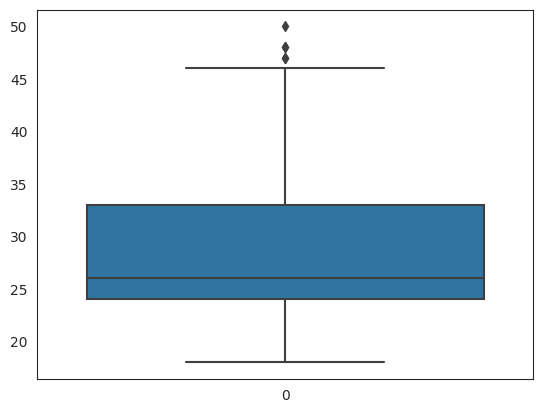

In [46]:
sns.boxplot(df['Age'])

In [47]:
np.where(df['Age']>46)

(array([ 78,  79, 139, 178, 179]),)

<Axes: >

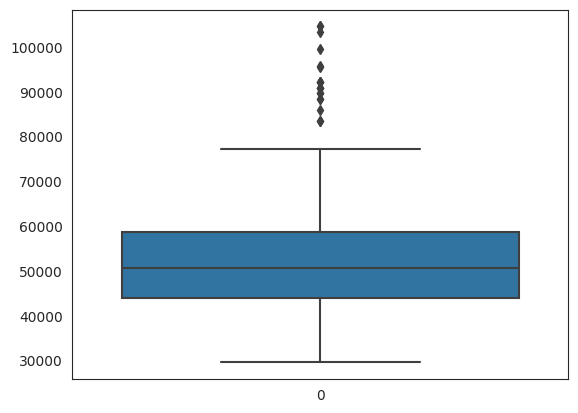

In [48]:
sns.boxplot(df['Income'])

In [49]:
np.where(df['Income']>80000)

(array([159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179]),)

<Axes: >

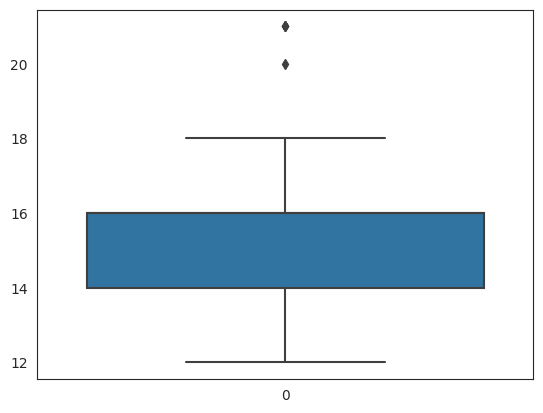

In [50]:
sns.boxplot(df['Education'])

In [51]:
np.where(df['Education']>18)

(array([156, 157, 161, 175]),)

<Axes: >

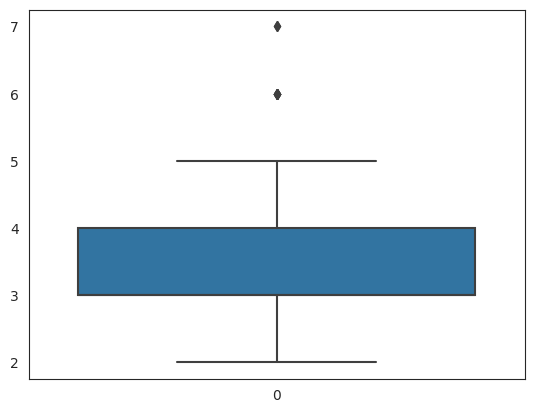

In [52]:
sns.boxplot(df['Usage'])

In [53]:
np.where(df["Usage"]>5)

(array([154, 155, 162, 163, 164, 166, 167, 170, 175]),)

<Axes: >

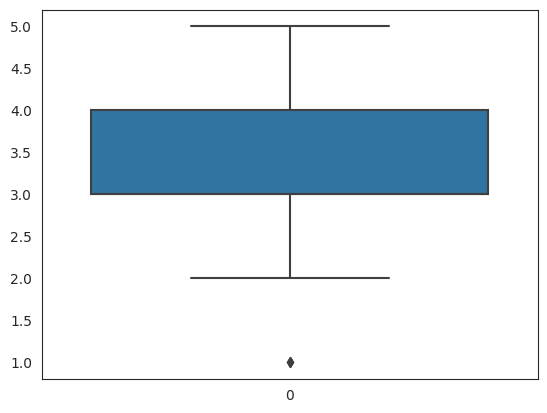

In [54]:
sns.boxplot(df['Fitness'])

In [55]:
np.where(df["Fitness"]<2)

(array([ 14, 117]),)

<Axes: >

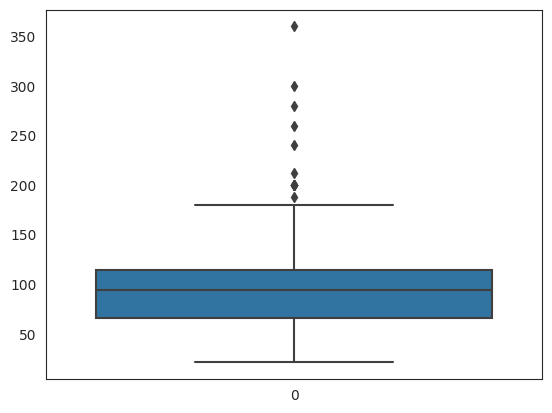

In [56]:
sns.boxplot(df['Miles'])

In [57]:
np.where(df["Miles"]>180)

(array([ 23,  84, 142, 148, 152, 155, 166, 167, 170, 171, 173, 175, 176]),)

**Observations**


* Since most of the customers who bought KP781 are male we can say that it is best suited for male not for female
* Cutomers who are in age between 25-30 are buying KP781 treadmill more, so it is adviced that people belong to 30+ and below 25 are not recommended to buy this treadmill.
* Customers who are less educated shouldn't buy KP781 treadmill.
* Customers who are not using treadmill less than 4 times a week shouldn't buy this treadmill.
* Customers with fitness less than 3 shouldn't buy KP781 treadmill.
* Customers who don't walk/run greater than 120 miles per week shouldn't nuy KP781 treadmill.
* There are no missing values in the data.
* There are 3 unique products in the dataset.
* KP281 is the most frequent product.
* Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
* Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
* Out of 180 data points, 104's gender is Male and rest are the female.
* Standard deviation for Income & Miles is very high. These variables might have the outliers in it.
* Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product